In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import figure
from tensorflow import keras
import math as mt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Read csv

In [10]:
data= pd.read_csv("C:\\Users\\asus\\Downloads\\archive (5)\\AMZN.csv")

Data Exploration and cleaning 

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5665 non-null   object 
 1   Open       5665 non-null   float64
 2   High       5665 non-null   float64
 3   Low        5665 non-null   float64
 4   Close      5665 non-null   float64
 5   Adj Close  5665 non-null   float64
 6   Volume     5665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 309.9+ KB


In [13]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5.665000e+03
mean,315.126044,318.499003,311.288491,315.053306,315.053306,7.602816e+06
std,488.289599,492.442904,483.041434,487.953106,487.953106,7.369511e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.150002,37.980000,36.500000,37.150002,37.150002,3.712600e+06
50%,80.110001,81.949997,78.010002,79.937500,79.937500,5.721800e+06
75%,320.989990,324.130005,316.750000,322.200012,322.200012,8.641200e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,1.043292e+08


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

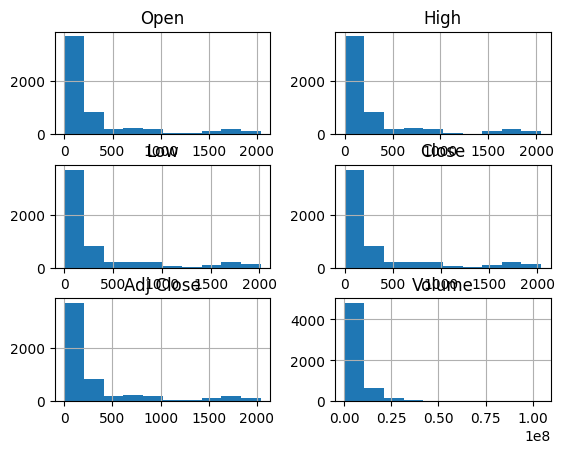

In [15]:
data.hist()

In [17]:
srt=data.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [18]:
srt.reset_index(inplace=True)

In [24]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


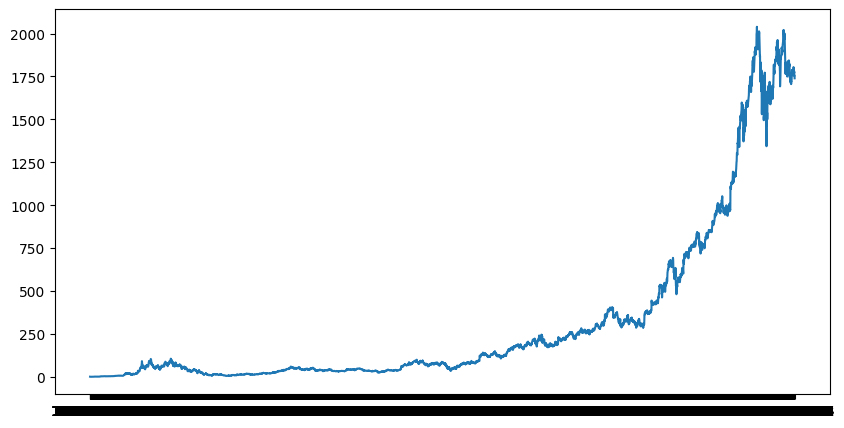

In [23]:
plt.figure(figsize=(10,5))
plt.plot(srt['Date'],srt['Close'])

In [25]:
close_srt = srt['Close']
scaler = MinMaxScaler(feature_range=(0,1))
close_srt=scaler.fit_transform(np.array(close_srt).reshape(-1,1))

In [26]:
close_srt

array([[2.75990426e-04],
       [1.63550209e-04],
       [1.53328014e-04],
       ...,
       [8.59477929e-01],
       [8.60208993e-01],
       [8.52795283e-01]])

Training Model

In [27]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt)-train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [28]:
def create_dataset(dataset,time_step=1):
    dataX,dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [29]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test= create_dataset(test_data,time_step)

In [30]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
55/55 [==============================] - 6s 118ms/step - loss: 2.2185e-06 - val_loss: 9.8468e-06
Epoch 2/60
55/55 [==============================] - 6s 117ms/step - loss: 2.1940e-06 - val_loss: 1.7705e-05
Epoch 3/60
55/55 [==============================] - 6s 117ms/step - loss: 2.3018e-06 - val_loss: 1.0708e-05
Epoch 4/60
55/55 [==============================] - 7s 118ms/step - loss: 2.7593e-06 - val_loss: 1.3958e-05
Epoch 5/60
55/55 [==============================] - 7s 119ms/step - loss: 2.3975e-06 - val_loss: 1.0876e-05
Epoch 6/60
55/55 [==============================] - 7s 120ms/step - loss: 2.1098e-06 - val_loss: 9.0367e-06
Epoch 7/60
55/55 [==============================] - 7s 122ms/step - loss: 2.7979e-06 - val_loss: 1.3381e-05
Epoch 8/60
55/55 [==============================] - 7s 133ms/step - loss: 1.9139e-06 - val_loss: 9.3007e-06
Epoch 9/60
55/55 [==============================] - 7s 135ms/step - loss: 1.9014e-06 - val_loss: 1.0382e-05
Epoch 10/60
55/55 [=========

Predict

In [36]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

50/50 [==============================] - 1s 23ms/step


In [37]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
mt.sqrt(mean_squared_error(y_train,train_predict))

98.38526610590215

In [40]:
mt.sqrt(mean_squared_error(y_test,test_predict))

1093.6279182730677

Prediction vs Actual

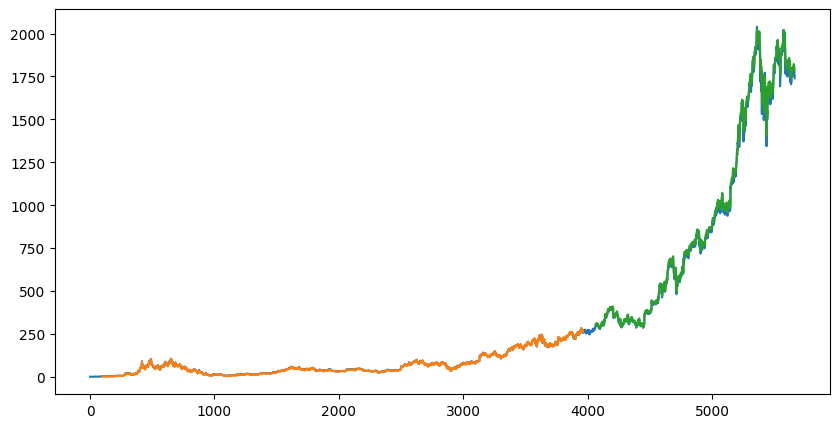

In [41]:
look_back=100
trainPredictPlot= np.empty_like(close_srt)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]= train_predict

testPredictPlot=np.empty_like(close_srt)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:]= test_predict


plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
